<a href="https://colab.research.google.com/github/glpappa/ML4Health/blob/main/EP1_intro_mimiciv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício Prático 1 
**Introdução a base MIMIC-IV**

Esse exercício será avaliado apenas para a graduação.No entanto, aconselhamos os outros alunos a seguí-lo para se acostumarem com a base de dados, o que pode facilitar a execução do próximo trabalho.

Aconselhamos vocês a seguirem o fluxo do notebook, uma vez que algumas tarefas são encadeadas. Todas as partes que precisam ser implmentadas estão maracada como "Análises a serem implementadas" ou simplesmente "Análises".

---

**ATENÇÃO**

- Para executar esse notebook, você precisa ter acesso às bases do MIMIC-IV no [BigQuery](https://mimic.mit.edu/docs/gettingstarted/cloud/bigquery/).
- Para executar esse notebook local, você precisa instalar o [gcloud-cli](https://cloud.google.com/sdk/docs/install?hl=pt-br) e inicializá-lo.


---





## Carregar pacotes

In [ ]:
from google.cloud import bigquery
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

**Rode o código abaixo somente se estiver no colab.**

In [ ]:
from google.colab import auth
auth.authenticate_user()

# from google.colab import data_table
# data_table.enable_dataframe_formatter()

## Variáveis globais

In [ ]:
projeto = 'mimic-ml-01' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore

dataset_hosp = 'physionet-data.mimiciv_hosp'
dataset_icu = 'physionet-data.mimiciv_icu'
dataset_ed = 'physionet-data.mimiciv_ed'
dataset_note = 'physionet-data.mimiciv_note'
dataset_cxr = 'physionet-data.mimic_cxr'

paciente = 10012853
admissao = 27882036

## Funções auxiliares

In [ ]:
def get_tabela(projeto_id:str, dataset_id: str, tabela_id: str, atributos_str:str, where_str:str = '') -> pd.DataFrame:
    sql = 'SELECT ' + atributos_str + ' FROM `' + dataset_id + '.' + tabela_id + '`'
    if where_str != '':
        sql += ' WHERE ' + where_str
    sql += ';'
    print(sql)
    return(pd.read_gbq(sql, projeto_id))

def get_lista_tabelas(dataset_id: str) -> list:
    lista_tabelas = cliente.list_tables(dataset_id)
    lista = [tabela.table_id for tabela in lista_tabelas]
    return(lista)

def imprimir_lista_tabelas(dataset_id: str) -> None:
    lista_tabelas = cliente.list_tables(dataset_id)
    print("Tabelas da base de dados '{}':".format(dataset_id))
    for i, tabela in enumerate(lista_tabelas):
        print("\t{}- {}.{}.{}".format(i+1, tabela.project, tabela.dataset_id, tabela.table_id))
        
def imprimir_lista_atributos(dataset_id: str, tabela_id: str) -> pd.DataFrame:
    tabela = cliente.get_table(dataset_id + '.' + tabela_id)
    nomes = [] 
    tipos = []
    modos = []
    for coluna in tabela.schema:
        nomes.append(coluna.name)
        tipos.append(coluna.field_type)
        modos.append(coluna.mode)
    df = pd.DataFrame({'Nome': nomes, 'Tipo do campo': tipos, 'Modo': modos})
    display(df)


## Conectar ao bigquery

In [ ]:
cliente = bigquery.Client(project=projeto, location=location)

# Listagem das tabelas
A MIMIC-IV é divida em 4 bases de dados: MIMIC-HOSP, MIMIC-ED, MIMIC-ICU, MIMIC-CXR.
Abaixo, listamos as tabelas de cada uma das bases.



## MIMIC-HOSP



In [ ]:
imprimir_lista_tabelas(dataset_hosp)

Tabelas da base de dados 'physionet-data.mimiciv_hosp':
	1- physionet-data.mimiciv_hosp.admissions
	2- physionet-data.mimiciv_hosp.d_hcpcs
	3- physionet-data.mimiciv_hosp.d_icd_diagnoses
	4- physionet-data.mimiciv_hosp.d_icd_procedures
	5- physionet-data.mimiciv_hosp.d_labitems
	6- physionet-data.mimiciv_hosp.diagnoses_icd
	7- physionet-data.mimiciv_hosp.drgcodes
	8- physionet-data.mimiciv_hosp.emar
	9- physionet-data.mimiciv_hosp.emar_detail
	10- physionet-data.mimiciv_hosp.hcpcsevents
	11- physionet-data.mimiciv_hosp.labevents
	12- physionet-data.mimiciv_hosp.microbiologyevents
	13- physionet-data.mimiciv_hosp.omr
	14- physionet-data.mimiciv_hosp.patients
	15- physionet-data.mimiciv_hosp.pharmacy
	16- physionet-data.mimiciv_hosp.poe
	17- physionet-data.mimiciv_hosp.poe_detail
	18- physionet-data.mimiciv_hosp.prescriptions
	19- physionet-data.mimiciv_hosp.procedures_icd
	20- physionet-data.mimiciv_hosp.provider
	21- physionet-data.mimiciv_hosp.services
	22- physionet-data.mimiciv_hosp

## MIMIC-ED

In [ ]:
imprimir_lista_tabelas(dataset_ed)

Tabelas da base de dados 'physionet-data.mimiciv_ed':
	1- physionet-data.mimiciv_ed.diagnosis
	2- physionet-data.mimiciv_ed.edstays
	3- physionet-data.mimiciv_ed.medrecon
	4- physionet-data.mimiciv_ed.pyxis
	5- physionet-data.mimiciv_ed.triage
	6- physionet-data.mimiciv_ed.vitalsign


## MIMIC-ICU

In [ ]:
imprimir_lista_tabelas(dataset_icu)

Tabelas da base de dados 'physionet-data.mimiciv_icu':
	1- physionet-data.mimiciv_icu.caregiver
	2- physionet-data.mimiciv_icu.chartevents
	3- physionet-data.mimiciv_icu.d_items
	4- physionet-data.mimiciv_icu.datetimeevents
	5- physionet-data.mimiciv_icu.icustays
	6- physionet-data.mimiciv_icu.ingredientevents
	7- physionet-data.mimiciv_icu.inputevents
	8- physionet-data.mimiciv_icu.outputevents
	9- physionet-data.mimiciv_icu.procedureevents


## MIMIC-CXR

In [ ]:
imprimir_lista_tabelas(dataset_cxr)

Tabelas da base de dados 'physionet-data.mimic_cxr':
	1- physionet-data.mimic_cxr.chexpert
	2- physionet-data.mimic_cxr.dicom_metadata_string
	3- physionet-data.mimic_cxr.record_list
	4- physionet-data.mimic_cxr.study_list


In [ ]:
imprimir_lista_tabelas(dataset_note)

Tabelas da base de dados 'physionet-data.mimiciv_note':
	1- physionet-data.mimiciv_note.discharge
	2- physionet-data.mimiciv_note.discharge_detail
	3- physionet-data.mimiciv_note.radiology
	4- physionet-data.mimiciv_note.radiology_detail


# Caracterização populacional
Nessa seção, são apresentadas algumas caracterizações considerando a população disponível na base.

### 1. Dados demográficos
- As tabelas que possuem dados demográficos são *admissions*, *patients* e *edstays*

#### Investigando a tabela *patients*

In [ ]:
imprimir_lista_atributos(dataset_hosp, 'patients')

,Nome,Tipo do campo,Modo
0,subject_id,INTEGER,REQUIRED
1,gender,STRING,REQUIRED
2,anchor_age,INTEGER,NULLABLE
3,anchor_year,INTEGER,REQUIRED
4,anchor_year_group,STRING,REQUIRED
5,dod,DATE,NULLABLE


In [ ]:
pacientes = get_tabela(projeto, dataset_hosp, 'patients', '*', '') 

SELECT * FROM `physionet-data.mimiciv_hosp.patients`;


In [ ]:
display(pacientes.head())

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10078138,F,18,2110,2017 - 2019,NaT
1,10180372,M,18,2110,2008 - 2010,NaT
2,10686175,M,18,2110,2011 - 2013,NaT
3,10851602,F,18,2110,2014 - 2016,NaT
4,10902424,F,18,2110,2017 - 2019,NaT


In [ ]:
num_pacientes = pacientes['subject_id'].unique().size
print('{}'.format(pacientes.shape))
print('Foram registrados ' + str(num_pacientes) + ' pacientes no hospital.')

(299712, 6)
Foram registrados 299712 pacientes no hospital.


#### Distribuição da variável idade

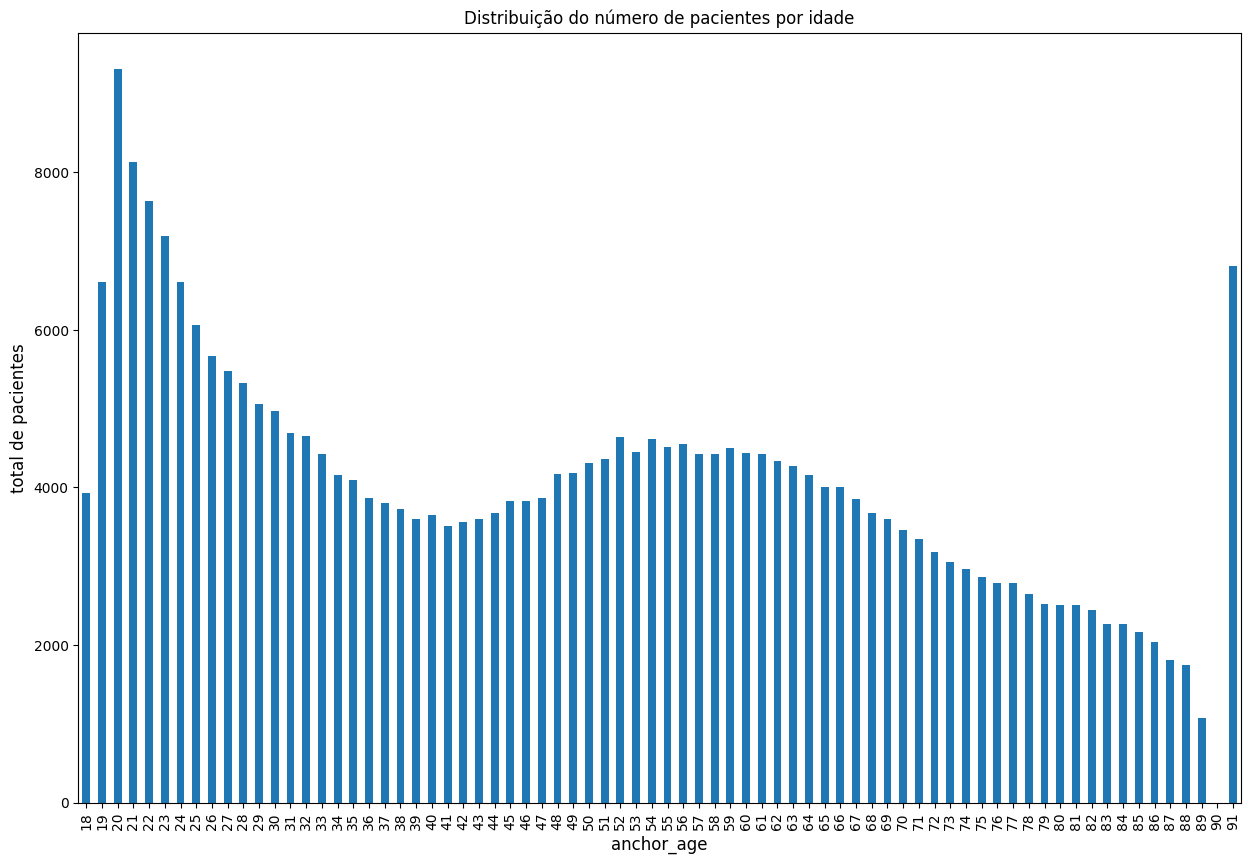

In [ ]:
idade_pacientes = pacientes[['subject_id','anchor_age']].groupby('anchor_age').count().reset_index()
lista_idades = idade_pacientes['anchor_age'].to_list()
for i in range(18,92):
    if i not in lista_idades:
        idade_pacientes = pd.concat([idade_pacientes, pd.DataFrame({'anchor_age': [i], 'subject_id': [0]})])
idade_pacientes = idade_pacientes.sort_values('anchor_age').set_index('anchor_age')

ax = idade_pacientes.plot(kind='bar', figsize=(15, 10), legend='', title='Distribuição do número de pacientes por idade')
ax.set_xlabel("anchor_age", fontsize=12)
ax.set_ylabel("total de pacientes", fontsize=12)
plt.show()

#### Análises a serem implementadas

Implemente cada análise em uma célula diferente, e sempre coloque o título do que está sendo analisado, conforme exemplo para variável gênero abaixo.


- Faça gráficos da distribuição de gênero (gender), seguro (insurance), estado civil (marital_status), raça (race). Esses dados estão na tabela *admissions*.
- Faça o gráfico da distribuição do meio de transporte de chegada (arrival_transport) no departamento de emergência e do local onde o paciente foi encaminhado (disposition). Esses dados estão na tabela *edstays*.
- Quantos dos atendimentos registrados no hospital são encaminhados para o departamento de emergência? (*admissions* versus *edstays*)
- Que porcentagem de pacientes vai à óbito no hospital?


#### Distribuição da variável gênero



In [ ]:
# código para distribuição de gênero

### 2. Dados administrativos

#### Investigando a tabela *services*

#### Análises a serem implementadas

* Repita o processo realizado na tabela *patients* para a tabela *services*. 
* Identifique quais os 5 serviços mais utilizados pelos pacientes. 

In [ ]:
# Escreva seu código aqui.

### 3. Sinais vitais

In [ ]:
sinais_vitais = get_tabela(projeto, dataset_ed, 'vitalsign', '*', '') 

SELECT * FROM `physionet-data.mimiciv_ed.vitalsign`;


In [ ]:
sinais_vitais.shape

(1564610, 11)

In [ ]:
sinais_vitais.head()

,subject_id,stay_id,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,rhythm,pain
0,10014967,36889300,2198-09-17 09:01:00,96.400000000,70.000000000,30.000000000,95.000000000,179,103,None,10
1,10015057,34668050,2151-04-15 01:10:00,97.800000000,69.000000000,10.000000000,95.000000000,89,45,None,0
2,10023708,32140682,2144-05-18 09:06:00,97.100000000,63.000000000,11.000000000,96.000000000,135,45,Normal Sinus Rhythm,0
3,10036086,39396729,2206-03-05 23:59:00,None,101.000000000,32.000000000,91.000000000,102,46,None,2
4,10036086,39396729,2206-03-06 00:00:00,None,102.000000000,34.000000000,92.000000000,73,40,None,None


#### Investigando a coluna heartrate

* Distribuição da coluna heartrate

<Axes: ylabel='Frequency'>

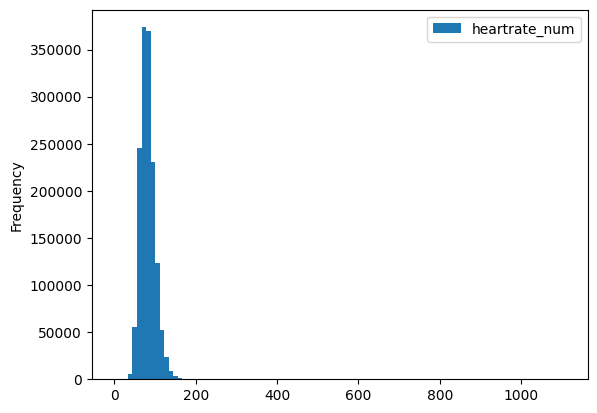

In [ ]:
sinais_vitais['heartrate_num'] = pd.to_numeric(sinais_vitais['heartrate'])
sinais_vitais[['heartrate_num']].plot.hist(bins=100)

* Análise de outliers da coluna heartrate

<Axes: >

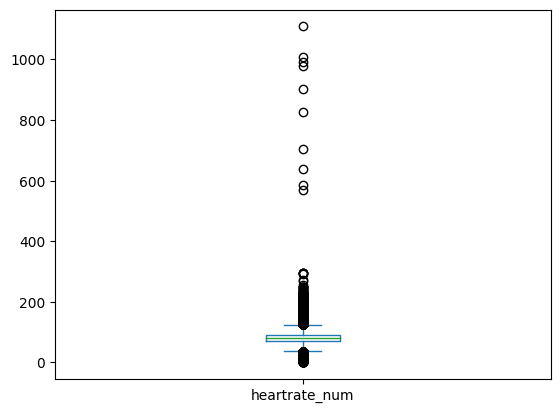

In [ ]:
sinais_vitais[['heartrate_num']].plot.box()

<Axes: ylabel='Frequency'>

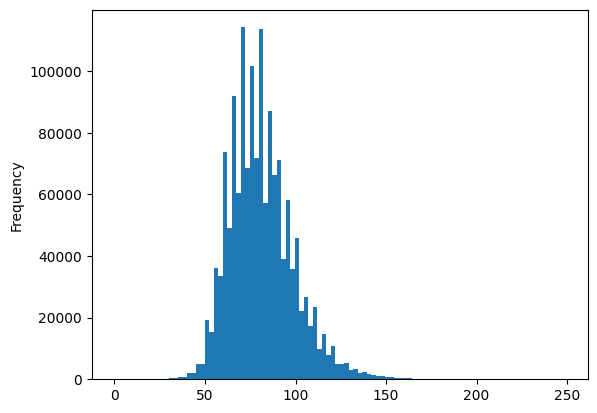

In [ ]:
taxacardiaca_corte = sinais_vitais.loc[sinais_vitais['heartrate_num'] < 250,'heartrate_num']
taxacardiaca_corte.plot.hist(bins=100)

Frequência cardíaca normal por idade:
* até 2 anos — 120 a 140 bpm;
* 8 até 17 anos — 80 a 100 bpm;
* adulto sedentário — 70 a 80 bpm;
* adultos que praticam atividades físicas e idosos — 50 a 60 bpm.


In [ ]:
sv_pac = sinais_vitais[['subject_id','heartrate_num']].merge(pacientes[['subject_id','anchor_age']], on='subject_id')
sv_pac[sv_pac['heartrate_num']<250].head()

,subject_id,heartrate_num,anchor_age
0,10014967,70.0,65
1,10014967,67.0,65
2,10014967,51.0,65
3,10014967,53.0,65
4,10014967,78.0,65


<Axes: title={'center': 'Frequência cardíaca por idade'}, xlabel='anchor_age', ylabel='heartrate_num'>

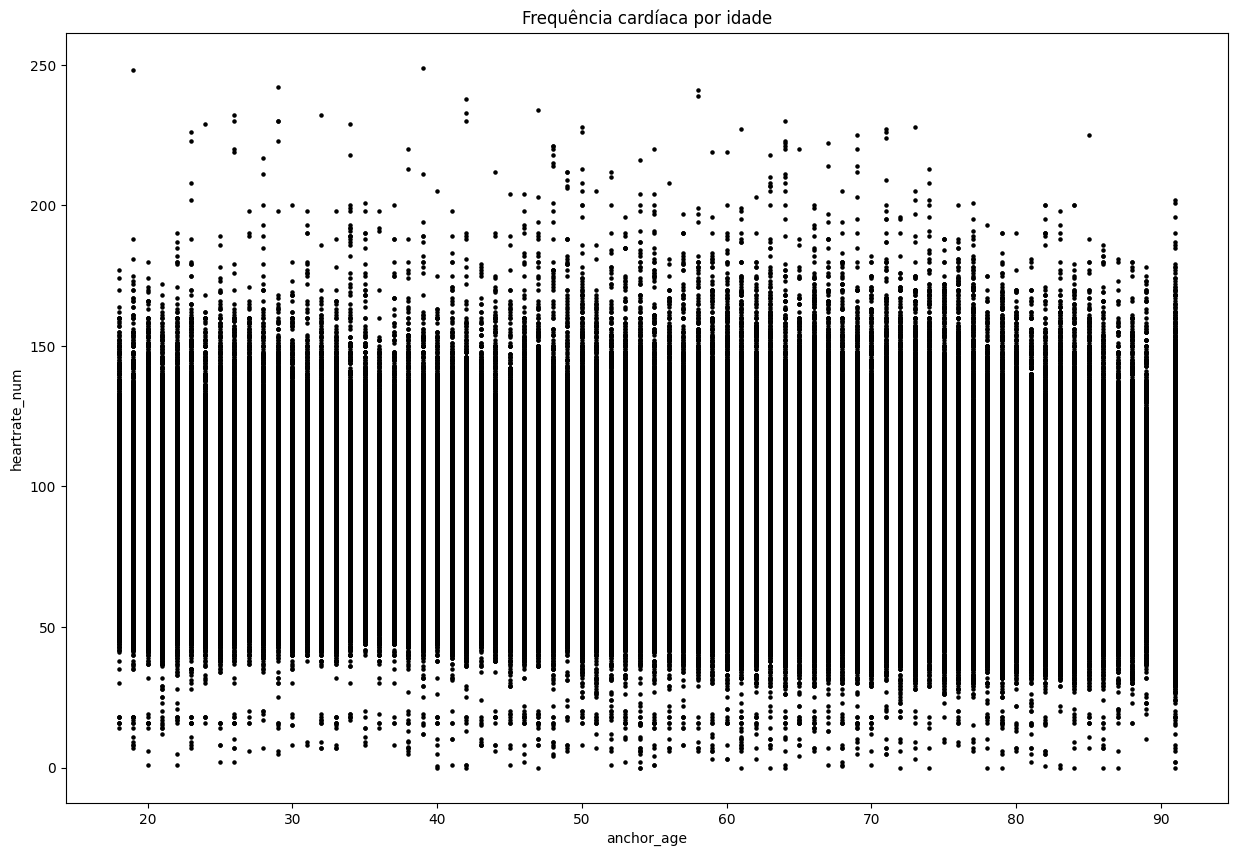

In [ ]:
sv_pac[sv_pac['heartrate_num']<250].plot.scatter(x='anchor_age', y='heartrate_num', s=5, figsize=(15,10), c='black', title='Frequência cardíaca por idade')

#### Análises a serem implementadas

1. Faça um estudo da distribuição e análise de outliers da taxa respiratória, temperatura dos pacientes, pressão arterial (sbp, dbp) e saturação de oxigênio (o2sat). Existem valores estranhos?
2. É necessário fazer um cálculo para saber a idade do paciente quando esses sinais vitais foram medidos e portanto os gráficos acima não refletem a realidade da população. Faça o ajuste necessário.
3. Existem dados de sinais vitais na base MIMIC-ICU, verifique e investigue em qual tabela se encontra. Se necessário, consulte https://github.com/MIT-LCP/mimic-iv/tree/master/concepts/measurement.

# Caracterização do paciente

#### Análises a serem implementadas

##### Investigando o fluxo do paciente numa hospitalização


In [ ]:
sql = """SELECT t.subject_id, t.hadm_id, t.careunit, t.intime, t.outtime 
        FROM `physionet-data.mimiciv_hosp.transfers` t
        WHERE t.hadm_id = 27882036 and t.subject_id = 10012853;"""
transferencias = pd.read_gbq(sql, projeto)
transferencias.reset_index(inplace=True)
transferencias = transferencias.loc[0:4,['index','careunit','intime','outtime']]
transferencias.loc[transferencias['careunit'] == 'Trauma SICU (TSICU)','index'] = 3
df_grafico = pd.concat([transferencias.iloc[:,0:3].rename(columns={'intime':'time'}),transferencias.iloc[:,[0,1,3]].rename(columns={'outtime':'time'})])
df_grafico.sort_values(['index','time'], inplace=True)
df_grafico.set_index('time',inplace=True)
df_grafico.groupby('careunit')['index'].plot(legend=True, xlabel='Período', ylabel='Ala', marker='o', figsize=(15,10), title='Transferências da paciente durante hospitalização')

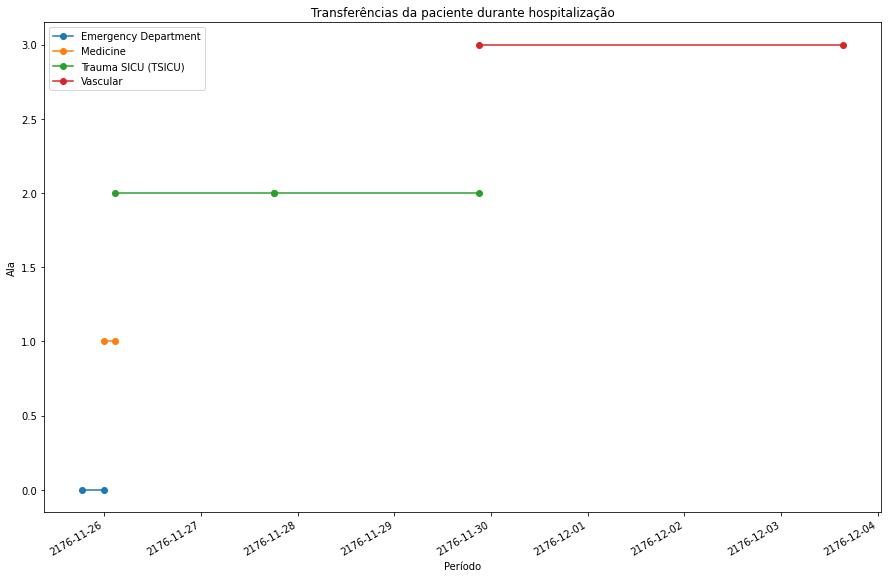

#### Investigando os sinais vitais do paciente internado no CTI.

In [ ]:
sql = """
select
    ce.subject_id
  , ce.stay_id
  , ce.charttime
  , AVG(case when itemid in (220045) and valuenum > 0 and valuenum < 300 then valuenum else null end) as heart_rate
  , AVG(case when itemid in (220179,220050) and valuenum > 0 and valuenum < 400 then valuenum else null end) as sbp
  , AVG(case when itemid in (220180,220051) and valuenum > 0 and valuenum < 300 then valuenum else null end) as dbp
  , AVG(case when itemid in (220052,220181,225312) and valuenum > 0 and valuenum < 300 then valuenum else null end) as mbp
  , AVG(case when itemid = 220179 and valuenum > 0 and valuenum < 400 then valuenum else null end) as sbp_ni
  , AVG(case when itemid = 220180 and valuenum > 0 and valuenum < 300 then valuenum else null end) as dbp_ni
  , AVG(case when itemid = 220181 and valuenum > 0 and valuenum < 300 then valuenum else null end) as mbp_ni
  , AVG(case when itemid in (220210,224690) and valuenum > 0 and valuenum < 70 then valuenum else null end) as resp_rate
  , ROUND(
      AVG(case when itemid in (223761) and valuenum > 70 and valuenum < 120 then (valuenum-32)/1.8 -- converted to degC in valuenum call
              when itemid in (223762) and valuenum > 10 and valuenum < 50  then valuenum else null end)
    , 2) as temperature
  , MAX(CASE WHEN itemid = 224642 THEN value ELSE NULL END) AS temperature_site
  , AVG(case when itemid in (220277) and valuenum > 0 and valuenum <= 100 then valuenum else null end) as spo2
  , AVG(case when itemid in (225664,220621,226537) and valuenum > 0 then valuenum else null end) as glucose
  FROM physionet-data.mimiciv_icu.chartevents ce
  where ce.stay_id IS NOT NULL and ce.subject_id = 10012853
  and ce.itemid in
  (
    220045, -- Heart Rate
    225309, -- ART BP Systolic
    225310, -- ART BP Diastolic
    225312, -- ART BP Mean
    220050, -- Arterial Blood Pressure systolic
    220051, -- Arterial Blood Pressure diastolic
    220052, -- Arterial Blood Pressure mean
    220179, -- Non Invasive Blood Pressure systolic
    220180, -- Non Invasive Blood Pressure diastolic
    220181, -- Non Invasive Blood Pressure mean
    220210, -- Respiratory Rate
    224690, -- Respiratory Rate (Total)
    220277, -- SPO2, peripheral
    -- GLUCOSE, both lab and fingerstick
    225664, -- Glucose finger stick
    220621, -- Glucose (serum)
    226537, -- Glucose (whole blood)
    -- TEMPERATURE
    223762, -- "Temperature Celsius"
    223761,  -- "Temperature Fahrenheit"
    224642 -- Temperature Site
    -- 226329 -- Blood Temperature CCO (C)
)
group by ce.subject_id, ce.stay_id, ce.charttime
;"""

sinal_vital_paciente = pd.read_gbq(sql, projeto) 

In [ ]:
sinal_vital_paciente.head()

,subject_id,stay_id,charttime,heart_rate,sbp,dbp,mbp,sbp_ni,dbp_ni,mbp_ni,resp_rate,temperature,temperature_site,spo2,glucose
0,10012853,31338022,2176-11-27 07:00:00,61.0,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN,None,92.0,83.0
1,10012853,31338022,2176-11-28 16:01:00,NaN,75.0,48.0,53.0,75.0,48.0,53.0,NaN,NaN,None,NaN,NaN
2,10012853,31338022,2176-11-27 20:00:00,68.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0,37.11,Oral,96.0,113.0
3,10012853,31338022,2176-11-27 18:01:00,NaN,132.0,45.0,67.0,132.0,45.0,67.0,NaN,NaN,None,NaN,NaN
4,10012853,31338022,2176-11-26 14:01:00,NaN,127.0,37.0,61.0,127.0,37.0,61.0,NaN,NaN,None,NaN,NaN


In [ ]:
sinal_vital_paciente.shape

(181, 15)

In [ ]:
sinal_vital_paciente['stay_id'].unique()

<IntegerArray>
[31338022]
Length: 1, dtype: Int64

In [ ]:
df_grafico = sinal_vital_paciente.loc[:,['charttime', 'heart_rate', 'sbp', 'dbp','spo2']]
df_grafico.rename(columns = {'charttime':'hora'}, inplace = True)
df_grafico.sort_values(by='hora', inplace=True)
df_grafico.set_index('hora', inplace=True)
df_grafico.head()

,heart_rate,sbp,dbp,spo2
hora,,,,
2176-11-26 02:34:00,77.0,NaN,NaN,94.0
2176-11-26 02:35:00,NaN,164.0,63.0,NaN
2176-11-26 02:36:00,73.0,NaN,NaN,96.0
2176-11-26 03:00:00,70.0,NaN,NaN,93.0
2176-11-26 04:00:00,66.0,NaN,NaN,90.0


<Axes: title={'center': 'Sinais vitais da paciente durante a hospitalização'}, xlabel='Período', ylabel='Valor'>

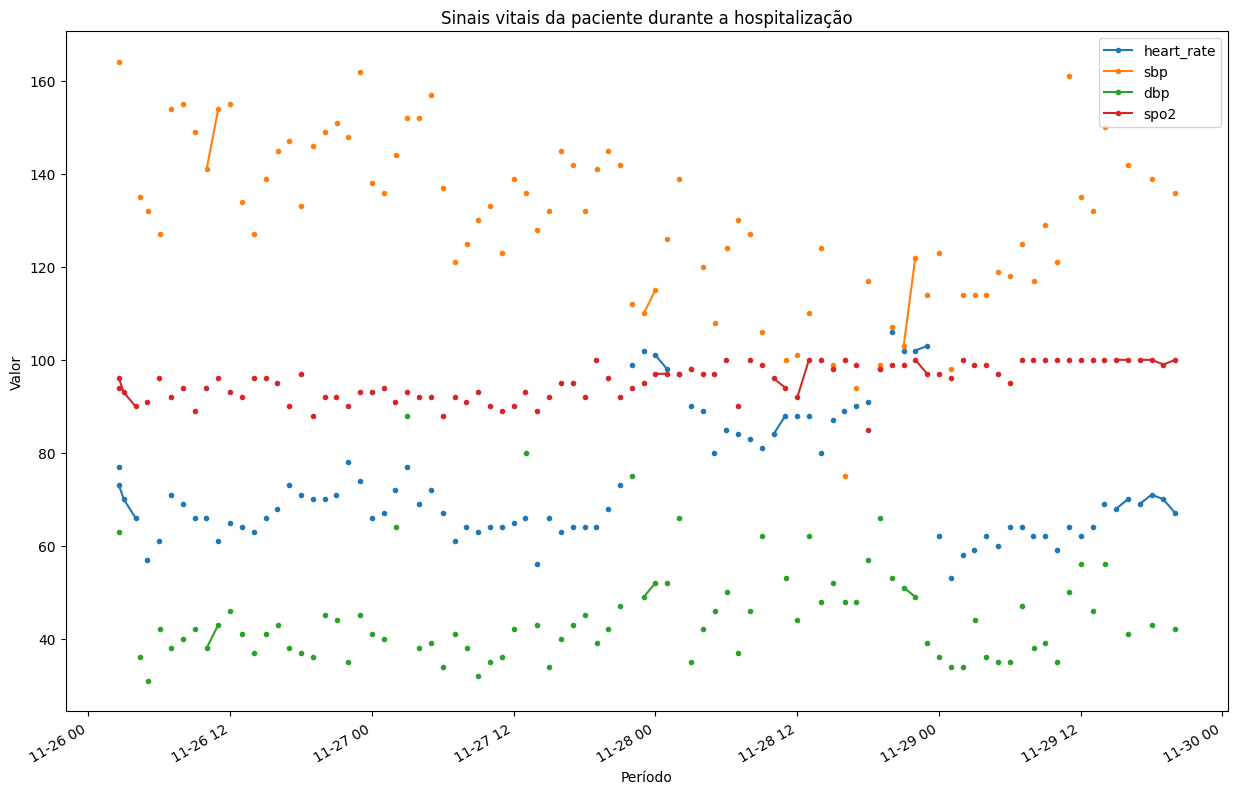

In [ ]:
df_grafico.plot(kind='line', legend=True, xlabel='Período', ylabel='Valor', marker='.', figsize=(15,10), title='Sinais vitais da paciente durante a hospitalização')

* Obs.: o pacote matplotlib apenas desenha uma linha entre dois pontos consecutivos com valores válidos e deixa em branco nos valores NaN.
* Para desenhar apenas o gráfico podemos preencher o dataframe utilizando a função *fillna*. Confira abaixo o resultado e teste outros valores para o parâmetro '*method*'. 

<Axes: title={'center': 'Sinais vitais da paciente durante a hospitalização'}, xlabel='Período', ylabel='Valor'>

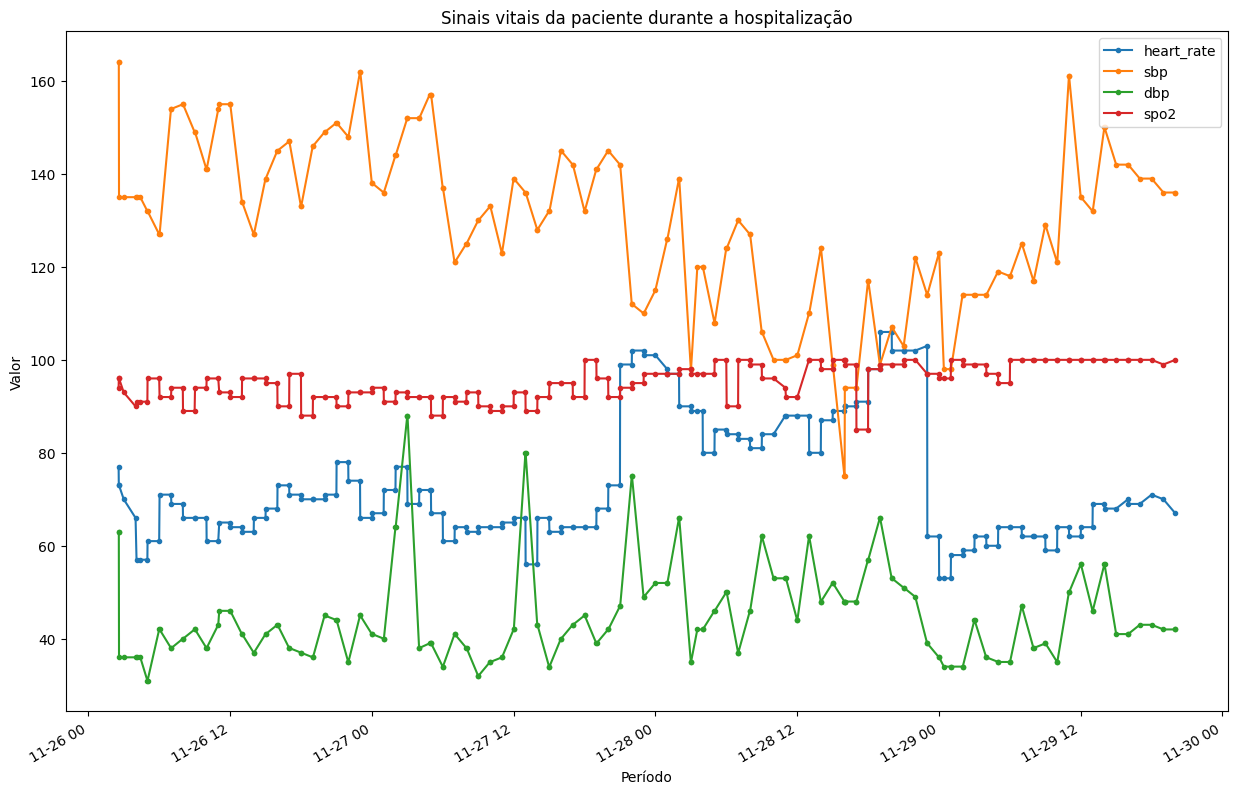

In [ ]:
df_grafico.fillna(method='bfill').plot(kind='line', legend=True, xlabel='Período', ylabel='Valor', marker='.', figsize=(15,10), title='Sinais vitais da paciente durante a hospitalização')

#####Análises a serem implementadas
* Teste outras abordagens para tratar esse problemas, como uso da média, remoção de registros, etc. No fim do semestre, voltaremos a esse assunto tratando outros métodos. Esse passo será importante para a próxima tarefa, onde você conseguirá testar a diferença de diferentes formas de imputação. 

# Previsão de Mortalidade
Até o momento, fizemos análises para entender melhor os dados da MIMIC-IV. Agora, criaremos um modelo simples para prever se o paciente irá sobreviver ou não depois de hospitalizado. Para isso, utilizaremos regressão logística.
- A tarefa é prever se o paciente vai sobreviver ou não utilizando um método de classificação.
- A princípio, iremos utilizar dados demográficos do paciente: idade, estado civil, raça, idioma. Iniciaremos com um método de regressão logística.

In [ ]:
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import OrdinalEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.feature_selection import SelectPercentile
# from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

#### 1. Selecionar dados

In [ ]:
demografico = get_tabela(projeto, dataset_hosp, 'patients', 'subject_id, anchor_age')
demog_atendimento = get_tabela(projeto, dataset_hosp, 'admissions', 'subject_id, hadm_id, marital_status, race, language, hospital_expire_flag')
demografico = demografico.merge(demog_atendimento, on='subject_id')

SELECT subject_id, anchor_age FROM `physionet-data.mimiciv_hosp.patients`;
SELECT subject_id, hadm_id, marital_status, race, language, hospital_expire_flag FROM `physionet-data.mimiciv_hosp.admissions`;


In [ ]:
demografico.head()

,subject_id,anchor_age,hadm_id,marital_status,race,language,hospital_expire_flag
0,10686175,18,27744664,SINGLE,AMERICAN INDIAN/ALASKA NATIVE,ENGLISH,0
1,11289691,18,23182566,SINGLE,BLACK/AFRICAN AMERICAN,ENGLISH,0
2,11289691,18,25537045,SINGLE,BLACK/AFRICAN AMERICAN,ENGLISH,0
3,11595073,18,26034097,SINGLE,WHITE,ENGLISH,0
4,11776346,18,29730252,SINGLE,ASIAN - ASIAN INDIAN,ENGLISH,0


#####Análises a serem implementadas
* Aqui a idade deve ser calculada da mesma forma que a sugestão 2 da seção *Investigando a coluna heartrate*! 

In [ ]:
# recalcular a idade dos pacientes de acordo com a data da hospitalização.

In [ ]:
demografico.shape

(431231, 7)

In [ ]:
demografico['subject_id'].unique().size

180733

#### 2. Analisar classes

<Axes: ylabel='Frequency'>

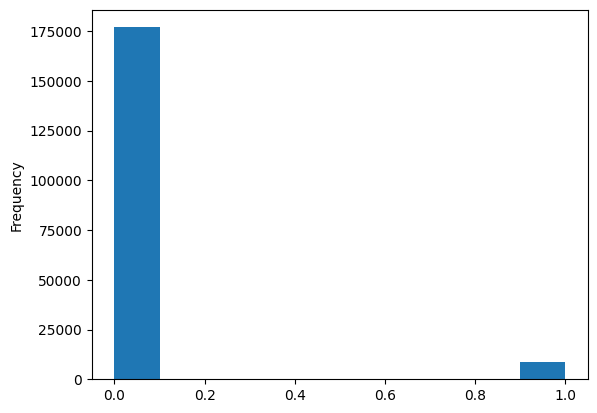

In [ ]:
demografico[['subject_id','hospital_expire_flag']].drop_duplicates()['hospital_expire_flag'].plot.hist()

#####Análises a serem implementadas
- Note que há um desbalanceamento de classes. Como tratar?

#### 3. Analisar dados faltantes

In [ ]:
demografico.columns

Index(['subject_id', 'anchor_age', 'hadm_id', 'marital_status', 'race',
       'language', 'hospital_expire_flag'],
      dtype='object')

In [ ]:
demografico.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431231 entries, 0 to 431230
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   subject_id            431231 non-null  Int64 
 1   anchor_age            431231 non-null  Int64 
 2   hadm_id               431231 non-null  Int64 
 3   marital_status        421998 non-null  object
 4   race                  431231 non-null  object
 5   language              431231 non-null  object
 6   hospital_expire_flag  431231 non-null  Int64 
dtypes: Int64(4), object(3)
memory usage: 28.0+ MB


#### 4. Particionar conjunto de dados (treino/teste)

In [ ]:
df_modelo = demografico.loc[:,['anchor_age', 'marital_status', 'race', 'language', 'hospital_expire_flag']].drop_duplicates()

In [ ]:
X = df_modelo.loc[:,['anchor_age', 'marital_status', 'race', 'language']]
y = df_modelo.loc[:,'hospital_expire_flag']
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,
                                   random_state=104, 
                                   test_size=0.10, 
                                   shuffle=True)

####Análises a serem implementadas
- Note que como o particionamento foi realizado, um mesmo paciente pode estar em ambos conjuntos, de treino e teste. Por que é um problema? E como resolver?
- Além disso, o mesmo paciente pode ter várias hospitalizações mas apenas na última ele faleceu. Isso é um problema? Explique e sugira uma solução se for o caso.

#### 5. Criar modelo

In [ ]:
#Ao rodar o comando fit no fim dessa célula, o Google colab gera automaticamente o pipeline seguido
#Esse fluxo não aparece em outros ambientes.
variaveis_numericas = ['anchor_age']
variaveis_categoricas = ['marital_status', 'race', 'language']

preprocessamento =  make_column_transformer(
    (OneHotEncoder(), variaveis_categoricas),
)

modelo1 = make_pipeline(
    preprocessamento,
    LogisticRegression(solver = "liblinear", class_weight="balanced"),
)

modelo2 = make_pipeline(
    preprocessamento,
    LogisticRegression(solver = "liblinear"),
)


modelo1.fit(X_treino, y_treino)
modelo2.fit(X_treino, y_treino)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['marital_status', 'race',
                                                   'language'])])),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

#####**Análises**

* Qual a diferença entre modelo1 e modelo2?

#### 6. Rodar e analisar 

In [ ]:
y_pred1 = modelo1.predict(X_teste)
print("Score do modelo1: %.3f" % modelo1.score(X_teste, y_teste))

Score do modelo1: 0.661


In [ ]:
y_pred2 = modelo2.predict(X_teste)
print("Score do modelo2: %.3f" % modelo2.score(X_teste, y_teste))

Score do modelo1: 0.845


#####**Análises**

* Explique a diferença de resultados entre modelo1 e modelo2. 
* Que outros atributos poderiam ser utilizados para essa tarefa, visando melhorar o resultado do modelo.
* Se desejar, crie um novo modelo com novos atributos ou formas de tratar dados faltantes e desbalanceamento de classses.